## **Hepatitis C Prediction**







**Aim** of this project is to identify a suitable machine learning algorithm which is capable of identifying whether a person suffering from liver disease or not. Aim should be to train various supervised learning models on this dataset so that we have a well performing model which is able to classify any new data point as a positive or negative with a reasonable degree of accuracy and perform better than the benchmarks.

**Dataset** contains laboratory values of blood donors and Hepatitis C patients and demographic values like age. The data was obtained from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/HCV+data

All attributes except Category and Sex are numerical.
Attributes 1 to 4 refer to the data of the patient:

1) X (Patient ID/No.)

2) Category (diagnosis) (values: '0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis')

3) Age (in years)

4) Sex (f,m)

Attributes 5 to 14 refer to laboratory data:
5) ALB
6) ALP
7) ALT
8) AST
9) BIL
10) CHE
11) CHOL
12) CREA
13) GGT
14) PROT

ALB: amount of albumin in patient's blood

ALP: amount of alkaline phosphatase in patient's blood

ALT: amount of alanine transaminase in patient's blood

AST: amount of aspartate aminotransferase in patient's blood

BIL: amount of bilirubin in patient's blood

CHE: amount of cholinesterase in patient's blood

CHOL: amount of cholesterol in patient's blood

CREA: amount of creatine in patient's blood

GGT: amount of gamma-glutamyl transferase in patient's blood

PROT: amount of protien in patient's blood

In [1]:
from google.colab import files
uploaded = files.upload()

Saving HepatitisCdata.csv to HepatitisCdata.csv


# **Exploratory Data Analysis**

In [2]:
import pandas as pd
df =pd.read_csv('/content/HepatitisCdata.csv')
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [4]:
Duplicate_Values = df.duplicated()
df[Duplicate_Values].sum()

Unnamed: 0    0.0
Category      0.0
Age           0.0
Sex           0.0
ALB           0.0
ALP           0.0
ALT           0.0
AST           0.0
BIL           0.0
CHE           0.0
CHOL          0.0
CREA          0.0
GGT           0.0
PROT          0.0
dtype: float64

In [5]:
df.describe()

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,308.000000,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,177.679487,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,308.000000,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [6]:
miss_val = df.isnull().sum()
print(miss_val)

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64


In [7]:
miss_val = df.isnull().sum()/len(df)*100
print("Missing values in variable ALP\t: {:.2f}%".format(miss_val['ALP']))
print("Missing values in variable CHOL\t: {:.2f}%".format(miss_val['CHOL']))
print("Missing values in variable ALB\t: {:.2f}%".format(miss_val['ALB']))
print("Missing values in variable ALT\t: {:.2f}%".format(miss_val['ALT']))
print("Missing values in variable PROT\t: {:.2f}%".format(miss_val['PROT']))

Missing values in variable ALP	: 2.93%
Missing values in variable CHOL	: 1.63%
Missing values in variable ALB	: 0.16%
Missing values in variable ALT	: 0.16%
Missing values in variable PROT	: 0.16%


In [8]:
df['ALB'].fillna(df['ALB'].mean(), inplace=True)
df['ALP'].fillna(df['ALP'].mean(), inplace=True)
df['CHOL'].fillna(df['CHOL'].mean(), inplace=True)
df['PROT'].fillna(df['PROT'].mean(), inplace=True)
df['ALT'].fillna(df['ALT'].mean(), inplace=True)
df.isnull().sum()

Unnamed: 0    0
Category      0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([  0., 100., 200., 300., 400., 500., 600.]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600')])

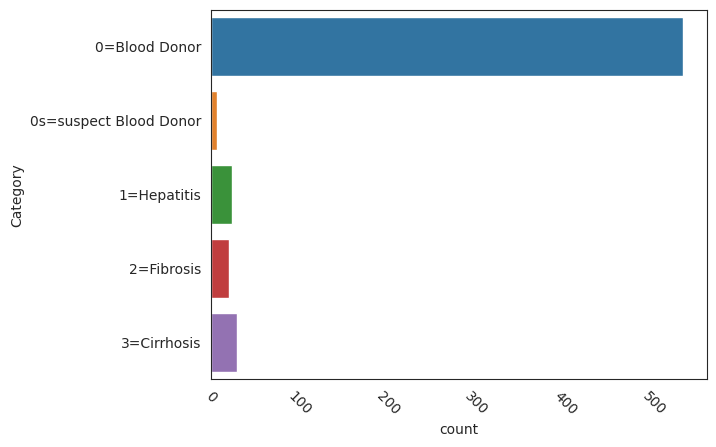

In [13]:
sns.set_style('white')
sns.countplot(y='Category', data=df)
 
# Rotate x-labels
plt.xticks(rotation=-45)

Distribution Plots

<Axes: xlabel='Category', ylabel='ALB'>

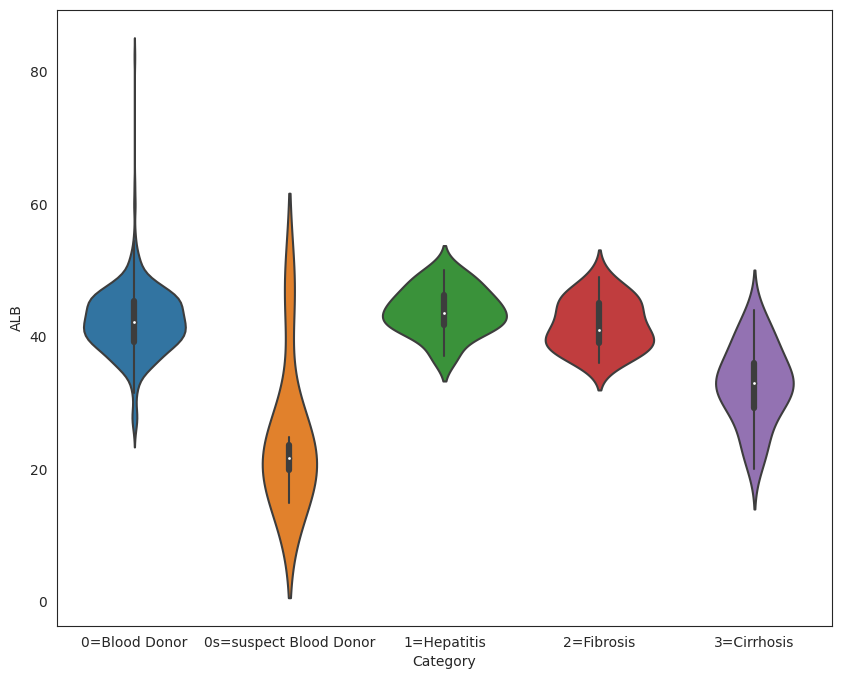

In [16]:
plt.figure(figsize=(10, 8))
sns.set_style('white')
sns.violinplot(x=df['Category'], y=df['ALB'])

<Axes: xlabel='Category', ylabel='ALB'>

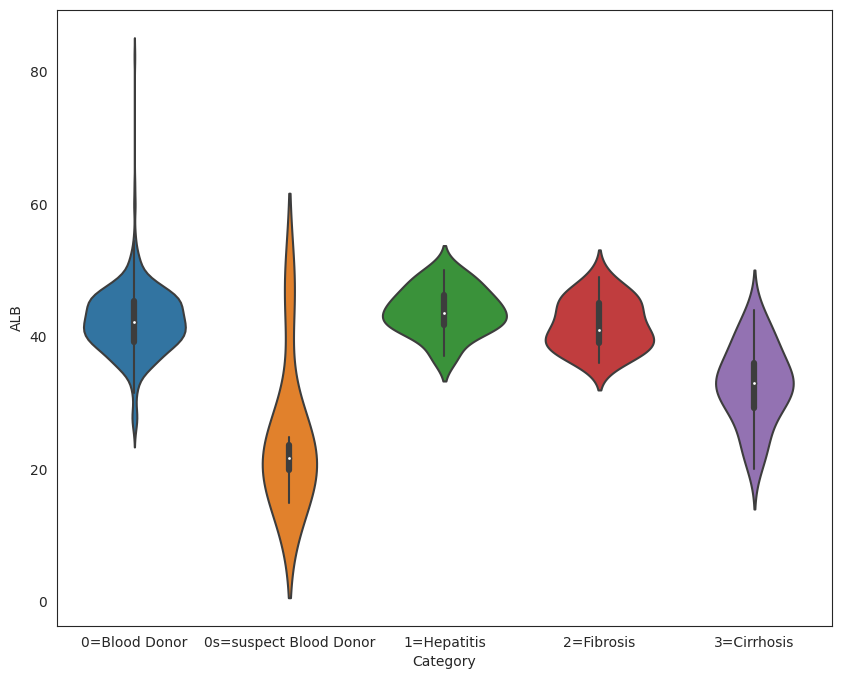

In [17]:
plt.figure(figsize=(10, 8))
sns.set_style('white')
sns.violinplot(x=df['Category'], y=df['ALB'])

<Axes: xlabel='Category', ylabel='ALT'>

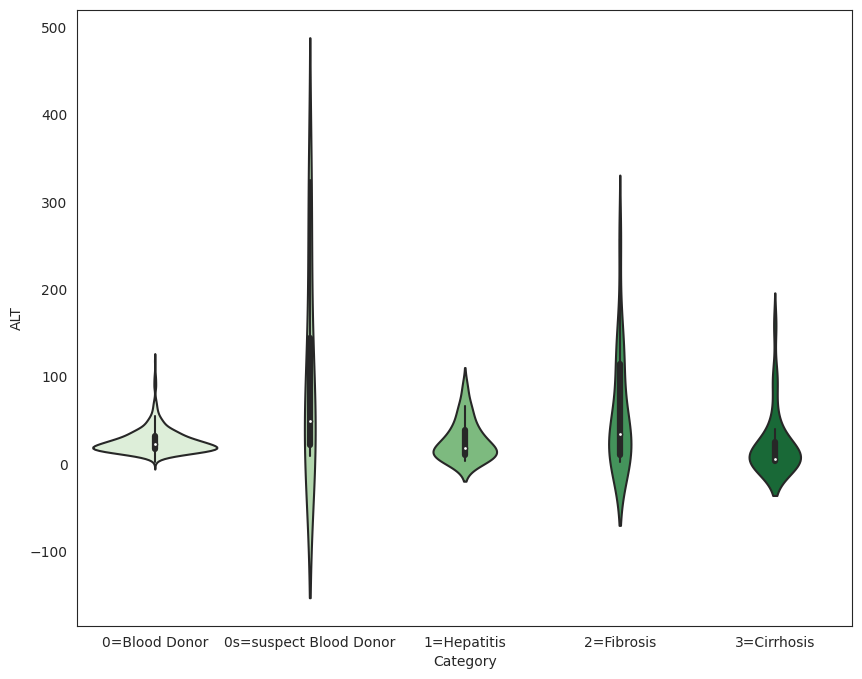

In [18]:
plt.figure(figsize=(10, 8))
sns.set_style('white')
sns.violinplot(x=df['Category'], y=df['ALT'],palette='Greens')

<Axes: xlabel='Category', ylabel='BIL'>

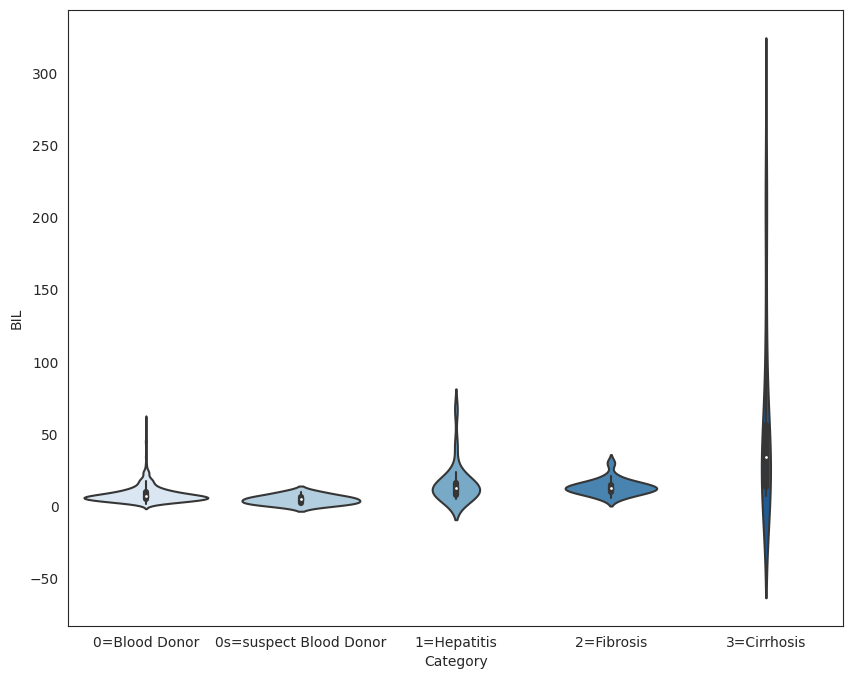

In [19]:
plt.figure(figsize=(10,8))
sns.set_style('white')
sns.violinplot(x=df['Category'], y=df['BIL'],palette='Blues')

In [20]:
df['Category'] = df['Category'].replace({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0, '1=Hepatitis': 1, '2=Fibrosis': 1, '3=Cirrhosis': 1})
df['Sex'] = df['Sex'].replace({'m': 0, 'f': 1})

In [31]:
df.head(10)

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
5,6,0,32,0,41.6,43.3,18.5,19.7,12.3,9.92,6.05,111.0,91.0,74.0
6,7,0,32,0,46.3,41.3,17.5,17.8,8.5,7.01,4.79,70.0,16.9,74.5
7,8,0,32,0,42.2,41.9,35.8,31.1,16.1,5.82,4.60,109.0,21.5,67.1
8,9,0,32,0,50.9,65.5,23.2,21.2,6.9,8.69,4.10,83.0,13.7,71.3
9,10,0,32,0,42.4,86.3,20.3,20.0,35.2,5.46,4.45,81.0,15.9,69.9


Total Suspected Patients : 540 
Total Healthy Patients : 75 


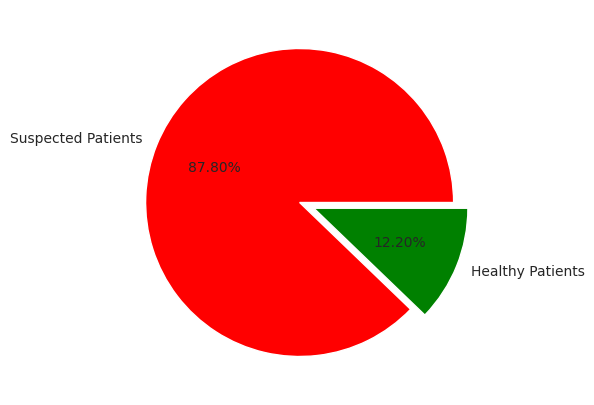

In [21]:
print ('Total Suspected Patients : {} '.format(df.Category.value_counts()[0]))
print ('Total Healthy Patients : {} '.format(df.Category.value_counts()[1]))

fig, ax = plt.subplots(figsize=(5,5))

plt.pie(x=df["Category"].value_counts(), 
        colors=["red","green"], 
        labels=["Suspected Patients","Healthy Patients"], 
        autopct="%1.2f%%",
        explode = (0, 0.1)
        )
plt.show()

Total Suspected Patients : 377 
Total Healthy Patients : 238 


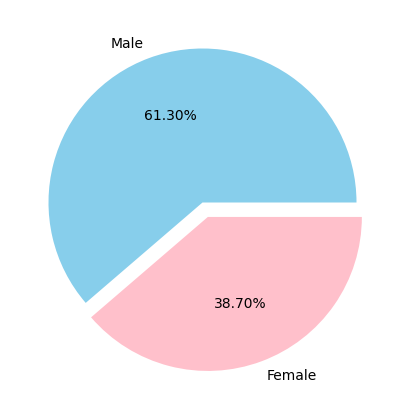

In [40]:
print ('Total Suspected Patients : {} '.format(df.Sex.value_counts()[0]))
print ('Total Healthy Patients : {} '.format(df.Sex.value_counts()[1]))
fig, ax = plt.subplots(figsize=(5,5))
plt.pie(x=df["Sex"].value_counts(), 
        colors=["skyblue","pink"], 
        labels=["Male","Female"], 
        autopct="%1.2f%%", 
        explode = (0, 0.1)
        )
plt.show()

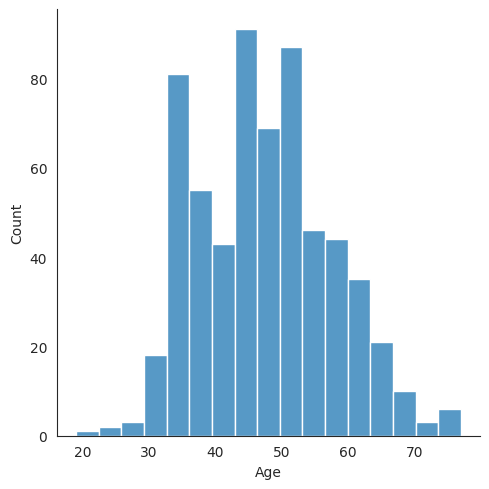

In [22]:
sns.displot(df['Age'])

<Axes: >

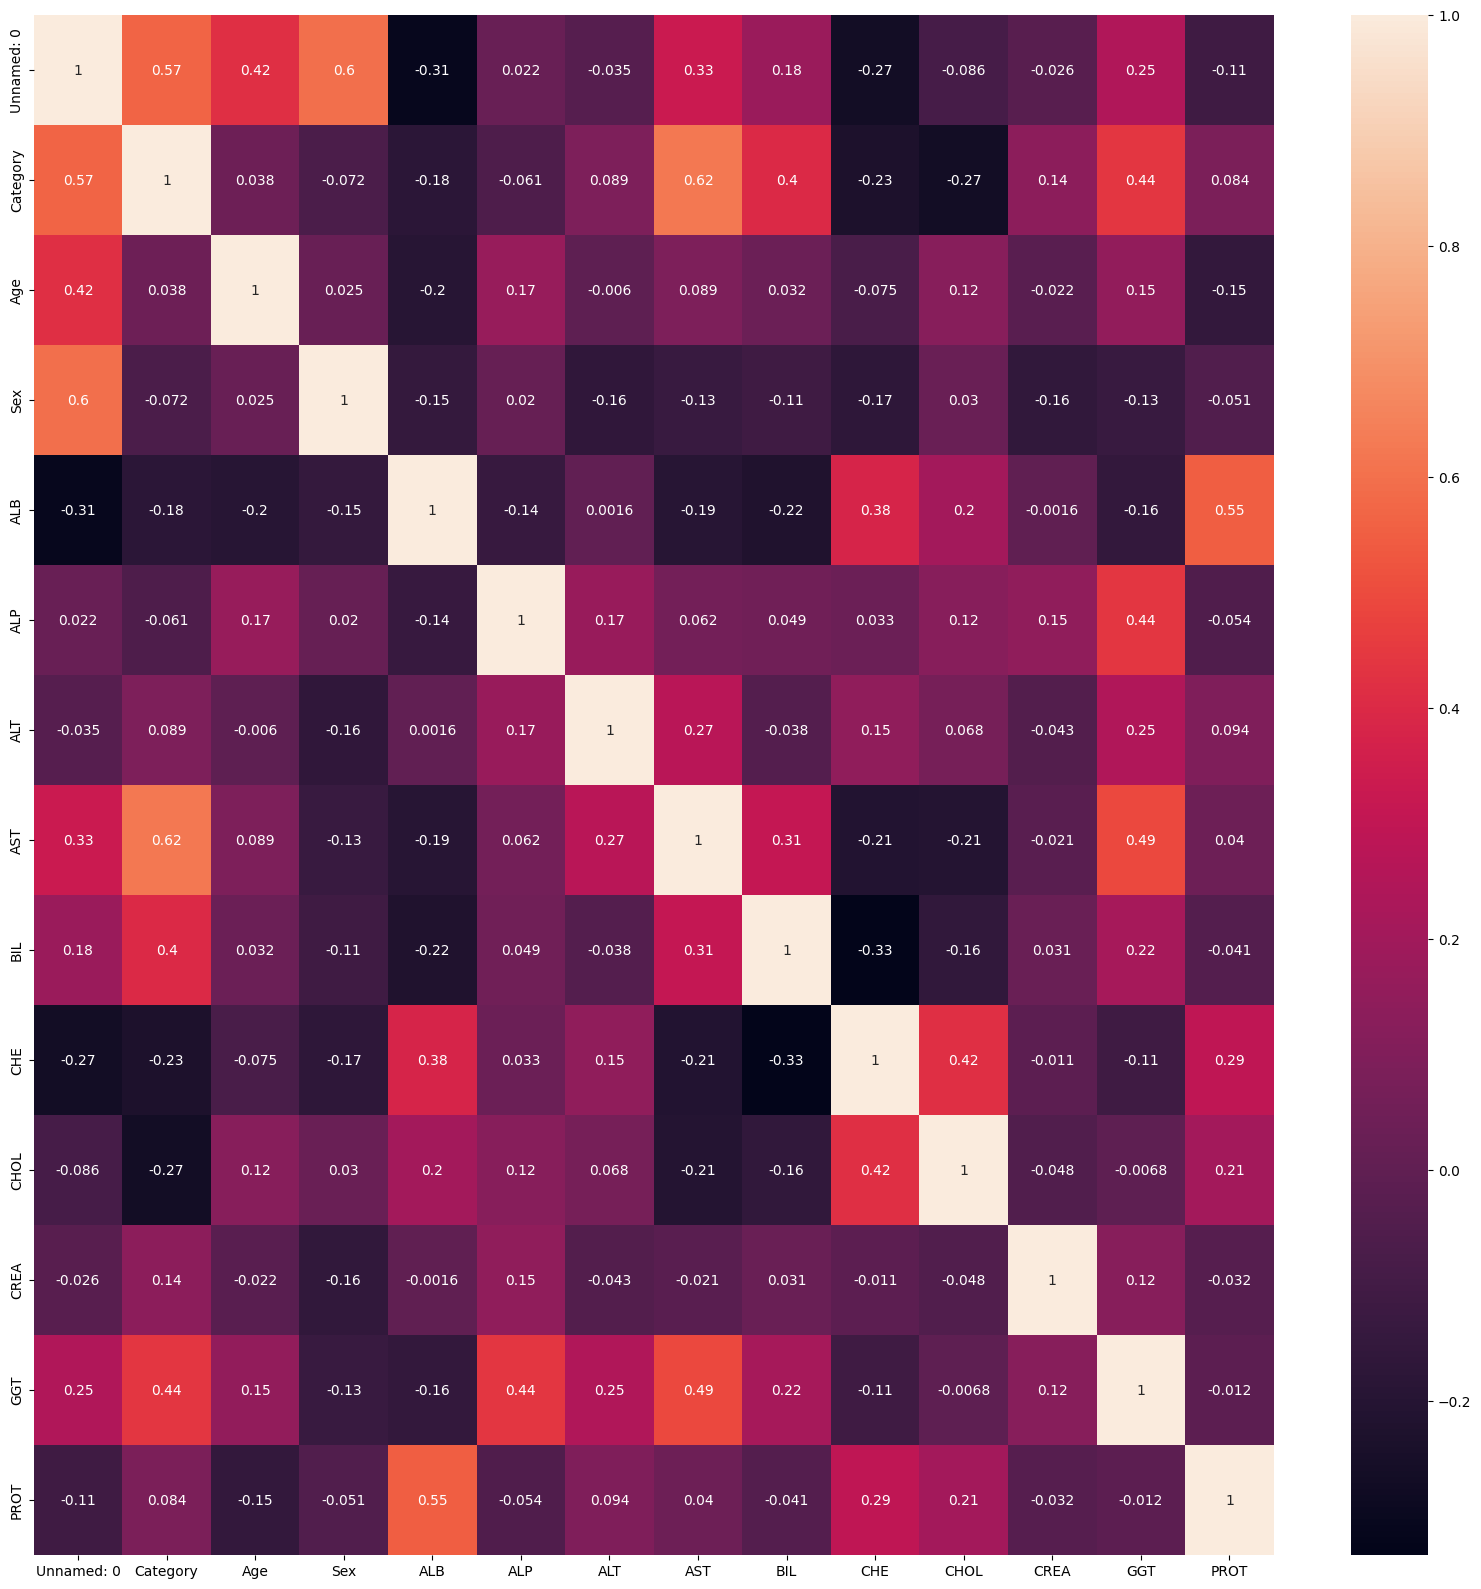

In [28]:
corr = df.corr()

plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True)

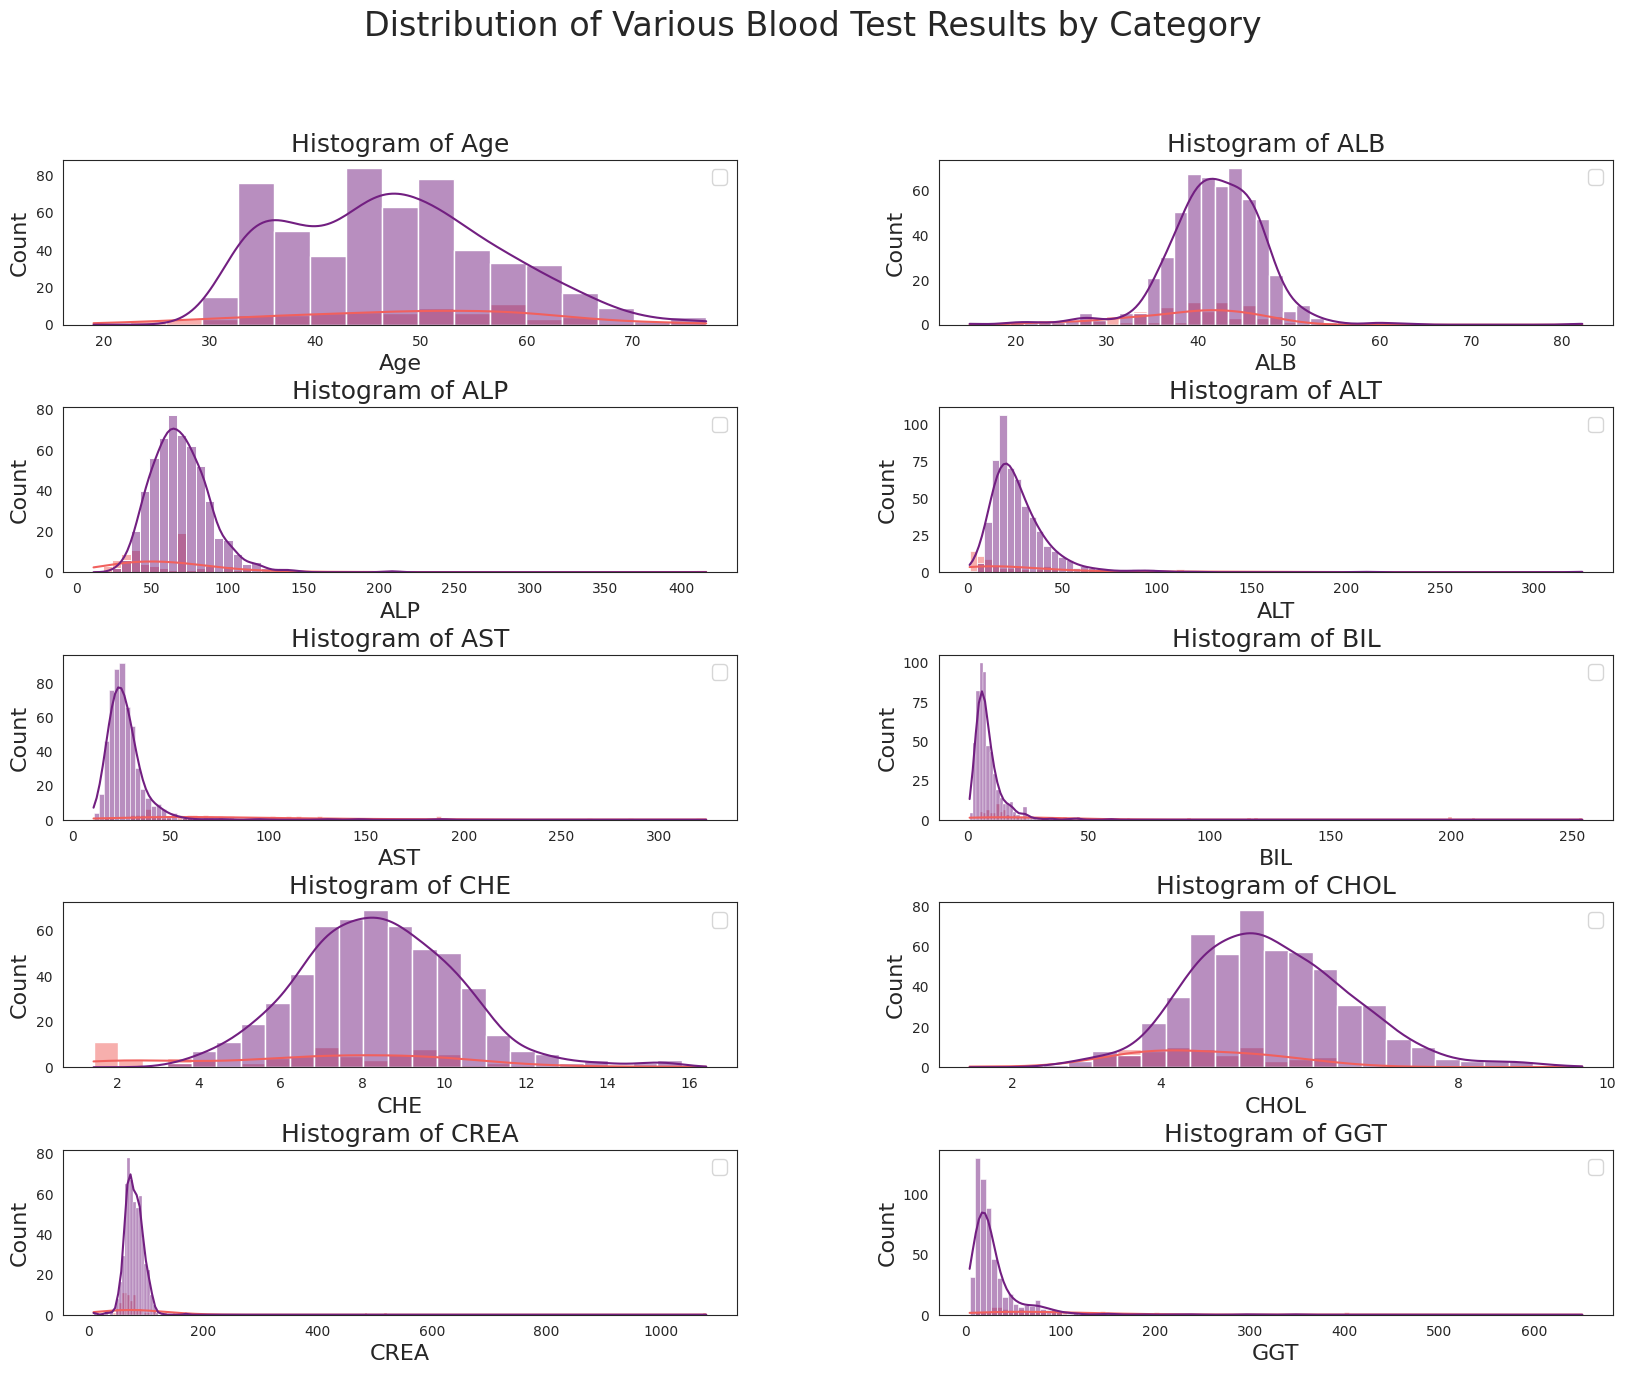

In [23]:
# Set up the figure and axes
fig, axes = plt.subplots(5, 2, figsize=(20, 15))
axes = axes.flatten()

# Define the columns to plot
columns = ["Age", "ALB", "ALP", "ALT", "AST", "BIL", "CHE", "CHOL", "CREA", "GGT"]

# Loop over each column and plot a histogram with multiple categories
for i, col in enumerate(columns):
    sns.histplot(x=df[col], hue=df["Category"], kde=True, palette="magma", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=16)  # increase x-axis label font size
    axes[i].set_ylabel("Count", fontsize=16)  # increase y-axis label font size
    axes[i].set_title(f"Histogram of {col}", fontsize=18)  # increase title font size
    axes[i].legend(fontsize=14)  # increase legend font size

# Add a main title to the figure
fig.suptitle("Distribution of Various Blood Test Results by Category", fontsize=24)

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # add more spacing between subplots

# ***Predictive Analysis***

Splitting the data into training and test datasets
Here, we are trying to predict whether the patient has Hepatitis C or not using the given data. Hence, the Category will be the y label and rest of the data will be the X or the input data.

In [24]:
X = df.drop("Category", axis=1)
y = df["Category"]

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [27]:
print("Train Set: ", X_train.shape, y_train.shape)
print("Test Set: ", X_test.shape, y_test.shape)

Train Set:  (461, 13) (461,)
Test Set:  (154, 13) (154,)


In [27]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB

Gaussian Score: 
 95.01
Gaussian Test Score: 
 96.75
Accuracy: 
 0.9675324675324676
[[135   4]
 [  1  14]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       139
           1       0.78      0.93      0.85        15

    accuracy                           0.97       154
   macro avg       0.89      0.95      0.92       154
weighted avg       0.97      0.97      0.97       154



<Axes: >

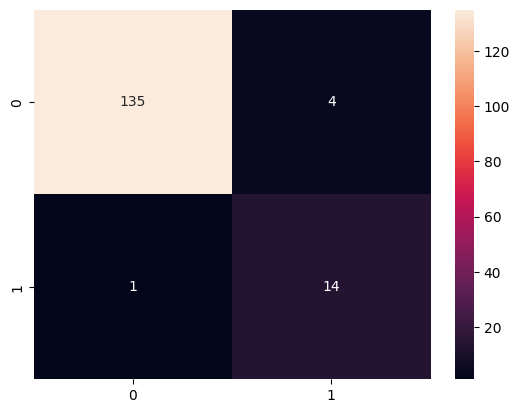

In [25]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

#Predict Output
gauss_predicted = gaussian.predict(X_test)

gauss_score = round(gaussian.score(X_train, y_train) * 100, 2)
gauss_score_test = round(gaussian.score(X_test, y_test) * 100, 2)

print('Gaussian Score: \n', gauss_score)
print('Gaussian Test Score: \n', gauss_score_test)
print('Accuracy: \n', accuracy_score(y_test, gauss_predicted))
print(confusion_matrix(y_test,gauss_predicted))
print(classification_report(y_test,gauss_predicted))

sns.heatmap(confusion_matrix(y_test,gauss_predicted),annot=True,fmt="d")

Random Forest Score: 
 100.0
Random Forest Test Score: 
 100.0
Accuracy: 
 1.0
[[139   0]
 [  0  15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      1.00      1.00        15

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154



<Axes: >

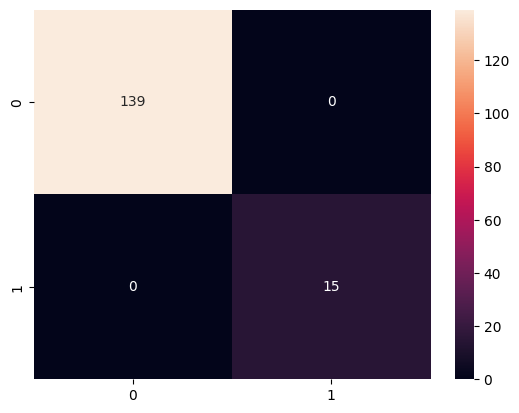

In [26]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
#Predict Output
rf_predicted = random_forest.predict(X_test)

random_forest_score = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_score_test = round(random_forest.score(X_test, y_test) * 100, 2)

print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(y_test,rf_predicted))
print(confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,rf_predicted))

sns.heatmap(confusion_matrix(y_test,rf_predicted),annot=True,fmt="d")

In [30]:
models = pd.DataFrame({
    'Model': ['Gaussian Naive Bayes','Random Forest'],
    'Score': [ gauss_score, random_forest_score],
    'Test Score': [gauss_score_test, random_forest_score_test]})
models.sort_values(by='Test Score', ascending=False)

,Model,Score,Test Score
1,Random Forest,100.00,100.00
0,Gaussian Naive Bayes,95.01,96.75
